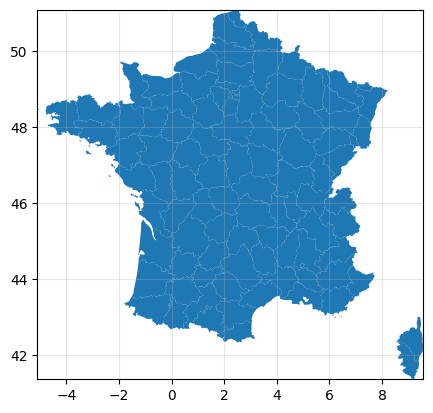

In [35]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Chemins d'accès au GeoJSON de la France et à l'image JPG
geojson_path = r"C:\Users\sofia\Desktop\4iabd\pa\data\image\moyj\test\test.geojson"

# Charger le GeoJSON en tant que GeoDataFrame
gdf = gpd.read_file(geojson_path)

# Tracer les entités géographiques
#gdf.plot()

# Obtenir les limites géographiques (boîte englobante)
bounds = gdf.total_bounds

# Créer le graphique
fig, ax = plt.subplots()

# Tracer les entités géographiques sur l'axe du graphique
gdf.plot(ax=ax)

# Définir les limites de l'axe du graphique en utilisant les limites géographiques
ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])

# Activer la grille avec une transparence de 0.3
ax.grid(True, alpha=0.3)

# Afficher le graphique
plt.show()

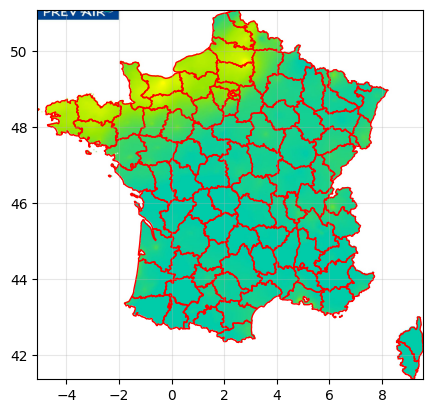

In [36]:


# Lire le GeoJSON
geojson_path = r"C:\Users\sofia\Desktop\4iabd\pa\data\image\moyj\test\test.geojson"
gdf = gpd.read_file(geojson_path)

# Lire l'image
image_path = r"C:\Users\sofia\Desktop\4iabd\pa\data\image\moyj\test2\PREVAIR.analyse.20230601.MOYJ.PM25.public.jpg"
img = Image.open(image_path)

# Transformer l'image en un tableau numpy pour une manipulation facile
img_array = np.array(img)

# Obtenir les limites du GeoJSON
bounds = gdf.total_bounds

# Créer une figure et des axes
fig, ax = plt.subplots()

# Afficher l'image en arrière-plan avec l'étendue correspondant aux limites du GeoJSON
ax.imshow(img_array, extent=[bounds[0], bounds[2], bounds[1], bounds[3]])

# Tracer le GeoJSON par dessus l'image
gdf.plot(ax=ax, facecolor='none', edgecolor='red')

# Définir les limites des axes
ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])

# Activer la grille
ax.grid(True, alpha=0.3)

# Afficher le graphique
plt.show()


In [49]:
import os
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.ops import cascaded_union
from skimage.draw import polygon
from skimage import io

# Lire le GeoJSON
geojson_path = r"C:\Users\sofia\Desktop\4iabd\pa\data\image\moyj\test\test.geojson"
gdf = gpd.read_file(geojson_path)

# Préparer un DataFrame pour enregistrer les couleurs moyennes
results = pd.DataFrame(columns=['code', 'nom', 'average_color'])

# Lire l'image
image_path = r"C:\Users\sofia\Desktop\4iabd\pa\data\image\moyj\test2\PREVAIR.analyse.20230601.MOYJ.PM25.public.jpg"
img = io.imread(image_path)

# Parcourir chaque département
for i, row in gdf.iterrows():
    # Obtenir le code et le nom
    code = row['code']
    nom = row['nom']

    # Créer un masque pour le département
    geom = cascaded_union(row.geometry)  # au cas où il y a plusieurs polygones pour le département
    x, y = geom.exterior.coords.xy
    # Convertir en coordonnées de pixels
    x, y = np.array(x), np.array(y)
    x = (x - img.shape[1]//2) * (img.shape[1] / (right - left))
    y = (y - img.shape[0]//2) * (img.shape[0] / (bottom - top))
    rr, cc = polygon(y, x)

    # Calculer la couleur moyenne pour le département
    color = np.mean(img[rr, cc], axis=0)
    # Enregistrer les résultats
    results = results.append({'code': code, 'nom': nom, 'average_color': color}, ignore_index=True)

# Enregistrer les résultats dans un fichier CSV
results.to_csv(r"C:\Users\sofia\Desktop\4iabd\pa\data\image\moyj\test\average_colors.csv", index=False)


C:\Users\sofia\AppData\Local\Temp\ipykernel_13808\175097748.py:27: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  geom = cascaded_union(row.geometry)  # au cas où il y a plusieurs polygones pour le département
c:\Users\sofia\anaconda3\envs\myenv\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\sofia\anaconda3\envs\myenv\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


AttributeError: 'DataFrame' object has no attribute 'append'

In [51]:
import os
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.ops import cascaded_union
from skimage.draw import polygon
from skimage import io

# Lire le GeoJSON
geojson_path = r"C:\Users\sofia\Desktop\4iabd\pa\data\image\moyj\test\test.geojson"
gdf = gpd.read_file(geojson_path)

# Préparer un DataFrame pour enregistrer les couleurs moyennes
results = pd.DataFrame(columns=['code', 'average_color'])

# Lire l'image
image_path = r"C:\Users\sofia\Desktop\4iabd\pa\data\image\moyj\test2\PREVAIR.analyse.20230601.MOYJ.PM25.public.jpg"
img = io.imread(image_path)

# Parcourir chaque département
for i, row in gdf.iterrows():
    # Obtenir le département
    department = row['code']

    # Créer un masque pour le département
    geom = cascaded_union(row.geometry)  # au cas où il y a plusieurs polygones pour le département
    x, y = geom.exterior.coords.xy
    # Convertir en coordonnées de pixels
    x, y = np.array(x), np.array(y)
    x = (x - img.shape[1]//2) * (img.shape[1] / (right - left))
    y = (y - img.shape[0]//2) * (img.shape[0] / (bottom - top))
    rr, cc = polygon(y, x)

    # Calculer la couleur moyenne pour le département
    color = np.mean(img[rr, cc], axis=0)
    # Enregistrer les résultats
    results = results.append({'code': department, 'average_color': color}, ignore_index=True)

# Enregistrer les résultats dans un fichier CSV
results.to_csv(r"C:\Users\sofia\Desktop\4iabd\pa\data\image\moyj\test\average_colors.csv", index=False)


C:\Users\sofia\AppData\Local\Temp\ipykernel_13808\452023317.py:26: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  geom = cascaded_union(row.geometry)  # au cas où il y a plusieurs polygones pour le département
c:\Users\sofia\anaconda3\envs\myenv\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\sofia\anaconda3\envs\myenv\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


AttributeError: 'DataFrame' object has no attribute 'append'

In [50]:
import pandas as pd

# Créer un DataFrame
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

# Créer une nouvelle ligne à ajouter
new_row = {'A': 7, 'B': 8}

# Ajouter la nouvelle ligne
df = df.append(new_row, ignore_index=True)

# Afficher le DataFrame
print(df)



AttributeError: 'DataFrame' object has no attribute 'append'

In [15]:
from PIL import Image, ImageDraw, ImageFont

# Ouvrir l'image
image = Image.open(r'C:\Users\sofia\Desktop\4iabd\pa\data\image\moyj\test\PREVAIR.analyse.20230601.MOYJ.PM25.public.jpg')

# Créer un objet "ImageDraw" pour dessiner sur l'image
draw = ImageDraw.Draw(image)

# Résolution spatiale de l'image (en degrés par pixel)
resolution = 0.0001

# Coordonnées géographiques du coin supérieur gauche de la bbox
lat_sup_gauche = 48.8594
lon_sup_gauche = 2.2945

# Largeur et hauteur de la bbox en pixels
largeur_bbox = 200
hauteur_bbox = 150

# Calculer les coordonnées géographiques de chaque coin de la bbox
lat_inf_gauche = lat_sup_gauche + hauteur_bbox * resolution
lon_inf_gauche = lon_sup_gauche
lat_inf_droit = lat_sup_gauche + hauteur_bbox * resolution
lon_inf_droit = lon_sup_gauche + largeur_bbox * resolution

# Dessiner la bbox sur l'image
bbox_coords = [(lon_sup_gauche, lat_sup_gauche), (lon_inf_droit, lat_inf_droit)]
draw.rectangle(bbox_coords, outline=(255, 0, 0), width=2)

# Coordonnées géographiques à l'intérieur de la bbox
lat_interieur = lat_sup_gauche + hauteur_bbox * 0.5 * resolution
lon_interieur = lon_sup_gauche + largeur_bbox * 0.5 * resolution

# Convertir les coordonnées en chaîne de caractères
coords_interieur = f"Lat: {lat_interieur}, Lon: {lon_interieur}"

# Définir les tailles de police à tester
font_sizes = [10, 12, 14, 16, 18, 20]

# Parcourir les tailles de police et dessiner le texte avec chaque taille
for font_size in font_sizes:
    # Charger la police par défaut avec la taille spécifiée
    font = ImageFont.truetype("arial.ttf", size=font_size)
    
    # Dessiner le texte sur l'image
    draw.text((10, 10), coords_interieur, fill=(255, 0, 0), font=font)

# Enregistrer l'image modifiée
image.save(r'C:\Users\sofia\Desktop\4iabd\pa\data\image\moyj\test\PREVAIR.analyse.20230601.MOYJ.PM25.public2.jpg')
